<a href="https://colab.research.google.com/github/mairapineda/Deep_Learning/blob/main/P1T5_Amazon_KMEANS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means números aleatorios

##Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#guardar los graficos en el cuaderno de jupyter
%matplotlib inline

##creamos unos arrays con números aleatorios

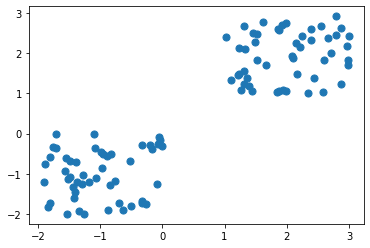

In [ ]:
#array de 100x2
X= -2 * np.random.rand(100,2)
#cambiamos datos de la columna 0 entre el 50 al 100 con datos lejanos
X[50:100, :] = 1 + (2 * np.random.rand(50,2))
#generamos dos grupos (columna1 y columna2)
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()

##Creamos la instancia del algoritmo

In [ ]:
#como sabemos de entrada que son dos grupos entonces seran dos centroides
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

##buscamos los centroides

In [ ]:
Centros = Kmean.cluster_centers_

##dibujamos los centroides para cada clouster

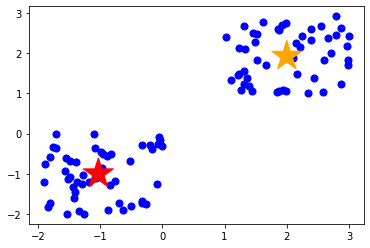

In [ ]:
colores=['orange','red']
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(Centros[:, 0], Centros[:, 1], marker='*', c=colores, s=1000)
plt.show()

##probando el algoritmo


In [ ]:
#forma como se crearon los cluster (0 y 1)
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

##Probando con datos manuales

In [ ]:
#https://www.w3resource.com/numpy/manipulation/reshape.php
data_test=np.array([-3.0,-3.0]).reshape(1, -1)
Kmean.predict(data_test)

array([1], dtype=int32)

#k-means prestamos bancarios

##importando librerias

In [1]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

##importando dataset

In [ ]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-prestamos.csv")
df_bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


##conociendo los datos

In [ ]:
df_bank.describe()
#df_bank.isnull().sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


tomaremos sólo dos variables de los datos – "LoanAmount"/monto del prestamos y "ApplicantIncome"/ingresos del cliente 

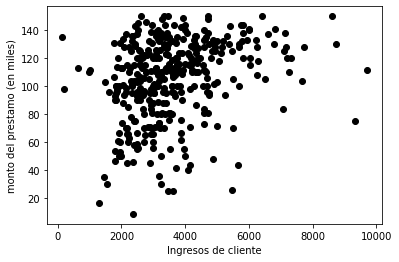

In [ ]:
X = df_bank[["LoanAmount","ApplicantIncome"]]
#Visualizamos los datos
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('Ingresos de cliente')
plt.ylabel('monto del prestamo (en miles)')
plt.show()

##buscando los centroides

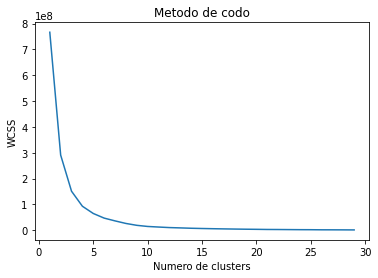

In [ ]:
#WCSS es la suma de cuadrados de las distancias
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
print(centroids)
print(labels)

[[ 103.70833333 3312.125     ]
 [ 112.15584416 4449.31168831]
 [ 117.23076923 7852.07692308]
 [  95.94736842 2181.77192982]
 [ 120.24242424 5866.03030303]]
[1 0 3 4 3 0 3 3 3 1 0 0 1 3 2 3 0 0 1 3 0 0 1 0 3 0 0 0 3 3 1 1 0 4 4 3 1
 3 0 1 1 3 3 0 0 3 0 1 0 2 1 3 0 1 0 3 0 0 1 3 0 3 0 0 1 0 3 3 1 3 1 0 2 3
 4 0 1 3 1 3 0 0 3 3 0 1 1 0 1 3 3 3 1 4 3 0 0 3 0 2 1 3 3 3 0 1 0 3 0 3 3
 1 0 3 3 1 0 1 3 0 3 0 1 1 0 1 3 0 0 4 0 0 3 0 1 1 3 1 0 4 1 3 0 0 0 0 0 0
 4 3 4 0 4 2 4 0 3 0 3 4 4 1 3 2 4 1 0 0 0 0 3 1 0 0 1 1 3 3 0 3 0 1 0 1 0
 4 1 1 3 3 0 1 3 1 0 3 0 0 3 4 0 0 3 0 3 1 0 1 1 3 1 0 0 4 1 3 0 3 0 3 4 3
 0 0 0 1 1 0 4 4 3 1 0 0 1 2 1 0 4 0 2 1 0 3 3 4 3 3 0 0 0 0 1 3 0 0 3 3 1
 3 3 0 3 0 3 0 4 3 3 2 3 1 4 0 3 2 4 3 0 3 2 1 0 1 0 0 3 3 1 3 2 0 1 1 2 4
 1 4 0 3 1 3 1 3 0 0 3 3 0 3 3 0 0 0 3 1 0 3 0 1 0 0 0 0 3 0 3 0 0 3 3 4 0
 3 4 1 0 3 0 0 1 3 0 3 0 0 3 1 0 0 4 3 0 4 1 0 0 3 0 4 0 0 0 3 3 0 3 0 3 3
 1 3 0 0 0 0 4 0 0 1 1]


##graficando datos y centroides

In [ ]:
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

[103.70833333 112.15584416 117.23076923  95.94736842 120.24242424]


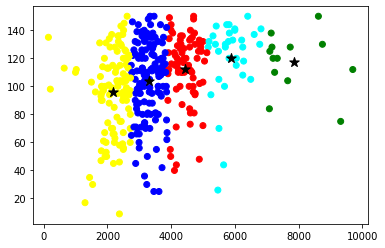

In [ ]:
print(centroids[:, 0])
# mostramos grupos según Openess y Extraversion 
f1 = df_bank['ApplicantIncome'].values
f2 = df_bank['LoanAmount'].values
 
plt.scatter(f1, f2, c=asignar)
#
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()

##resultados en tablas

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_bank.index.values
df_cluster['data_index']= df_bank.Education
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,Graduate,2
1,Graduate,3
2,Not Graduate,1
3,Graduate,4
4,Not Graduate,1


In [ ]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
3,Graduate,4
33,Graduate,4
34,Graduate,4
74,Graduate,4
93,Graduate,4
129,Not Graduate,4
139,Graduate,4
148,Graduate,4
150,Graduate,4
152,Graduate,4


#k-means psicología (los grandes cinco)


---
*   “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
*   “co” =Conscientiousness – grado de orden, prolijidad, organización
*   “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
*   “ag” = Agreeableness – grado de empatía con los demás, temperamento
*   “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.


##Importando librerías

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [ ]:
df_psico = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-psicologia.csv")
df_psico.head(5)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


##conociendo los datos

---Categorias 
*   1-Actor/actriz
*   2-Cantante
*   3-Modelo
*   4-Tv, series
*   5-Radio
*   6-Tecnología
*   7-Deportes
*   8-Politica
*   9-Escritor

In [ ]:
df_psico.describe()
#df_psico.isnull().sum()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


###graficando

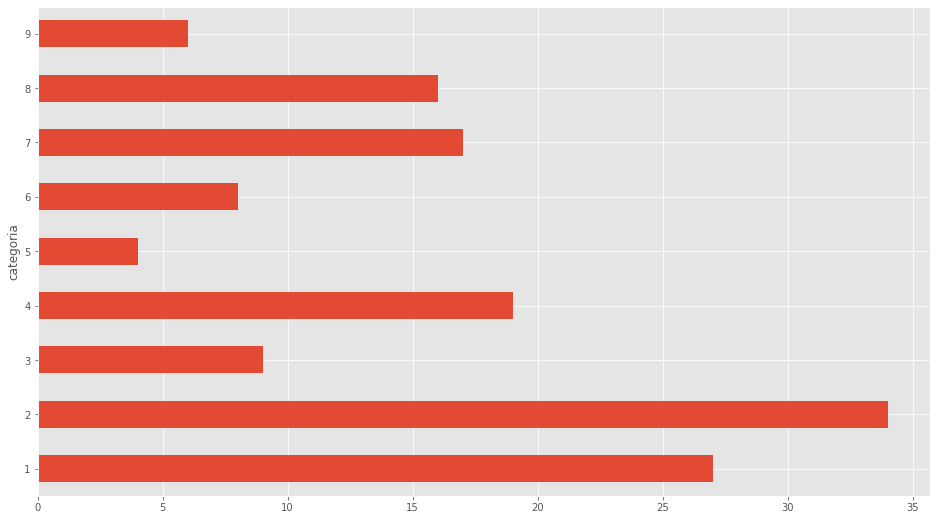

In [ ]:
df_psico.groupby('categoria').size().plot.barh()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


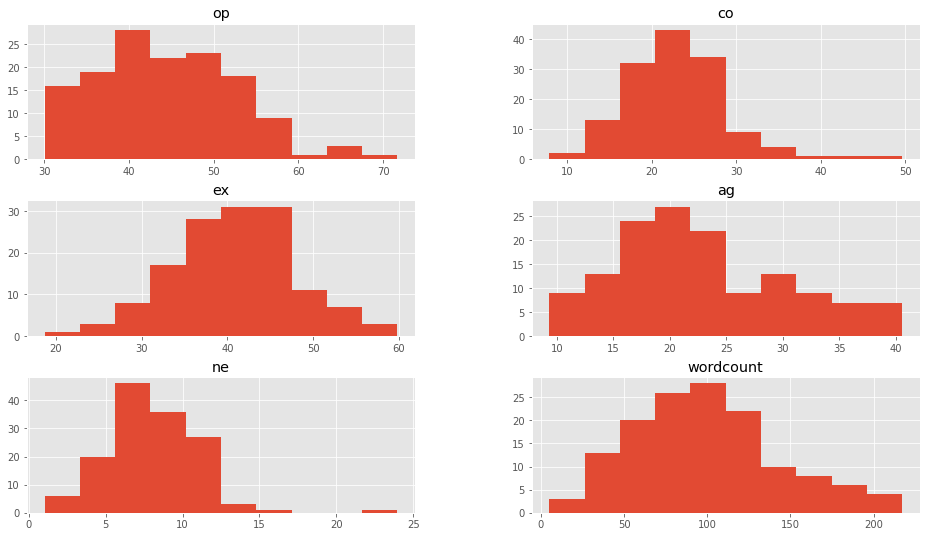

In [ ]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


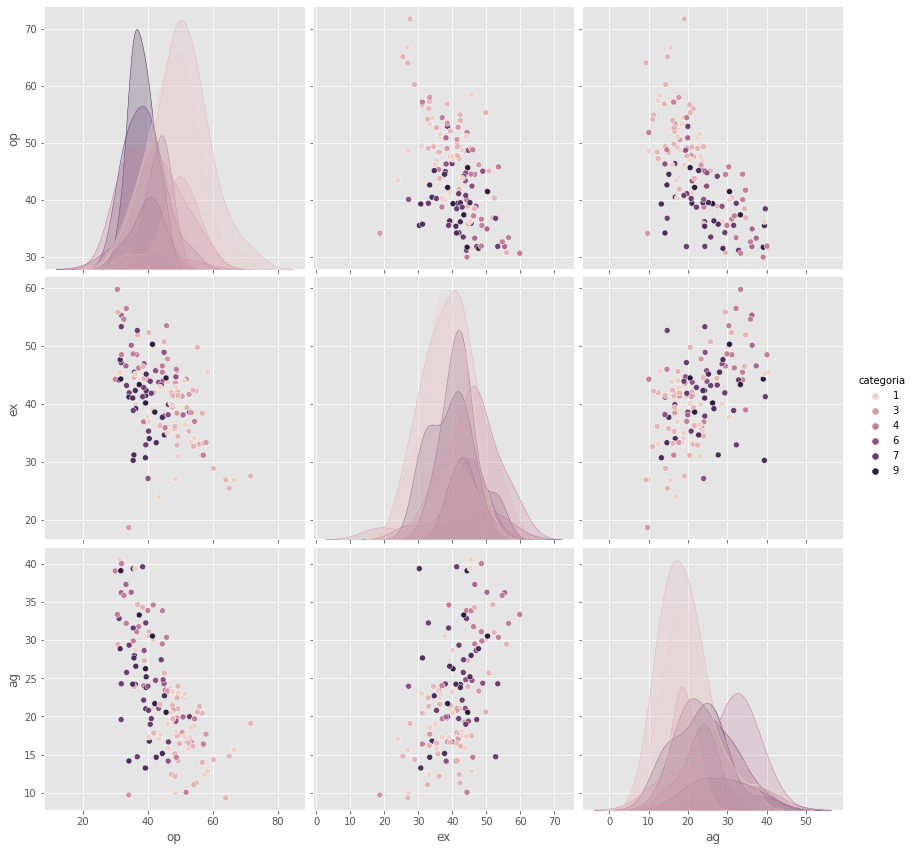

In [ ]:
#graficos de relaciones en pares en el dataset.
#hue= variación de colores dependiendo del valor de la variable
sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')
#Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías. 

##Separamos datos (X y Y)
Aca no trabajaremos con **train** y **test** pues no es un algoritmo de aprendizaje supervisado

In [ ]:
#X = np.array(df_psico[["op","ex","ag"]])
X = np.array(df_psico[["op","co","ex","ag","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

###Graficamos los valores de X en un grafico 3D

['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

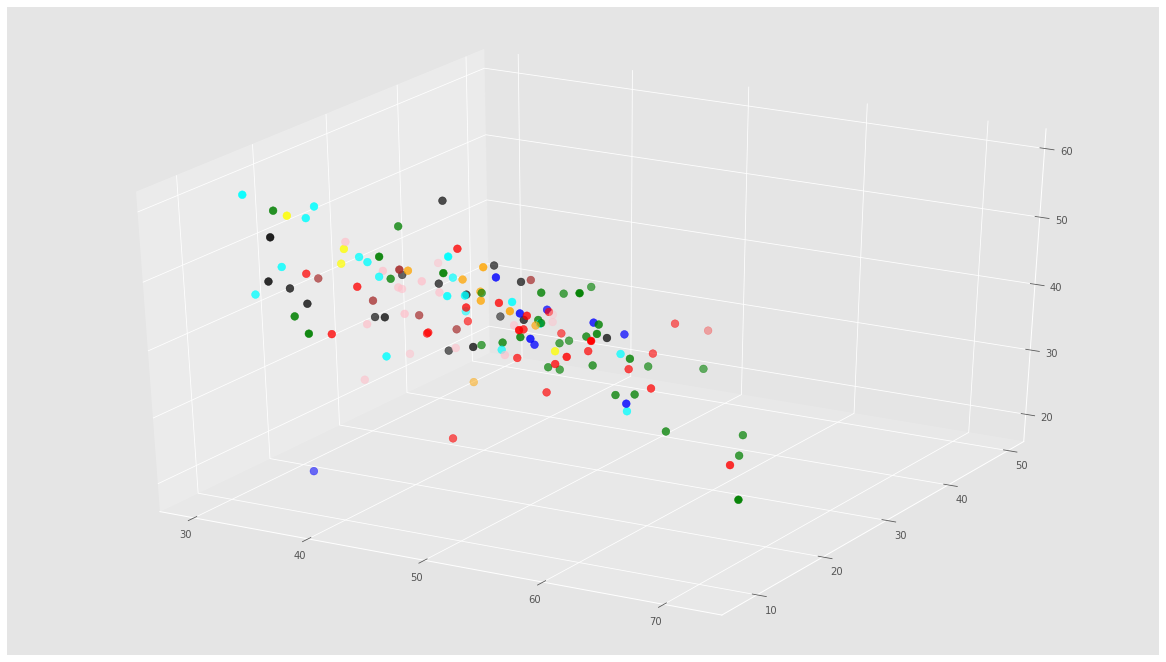

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

##encontramos el total de clousters (agrupamientos) idoneo
usaremos el método de codo

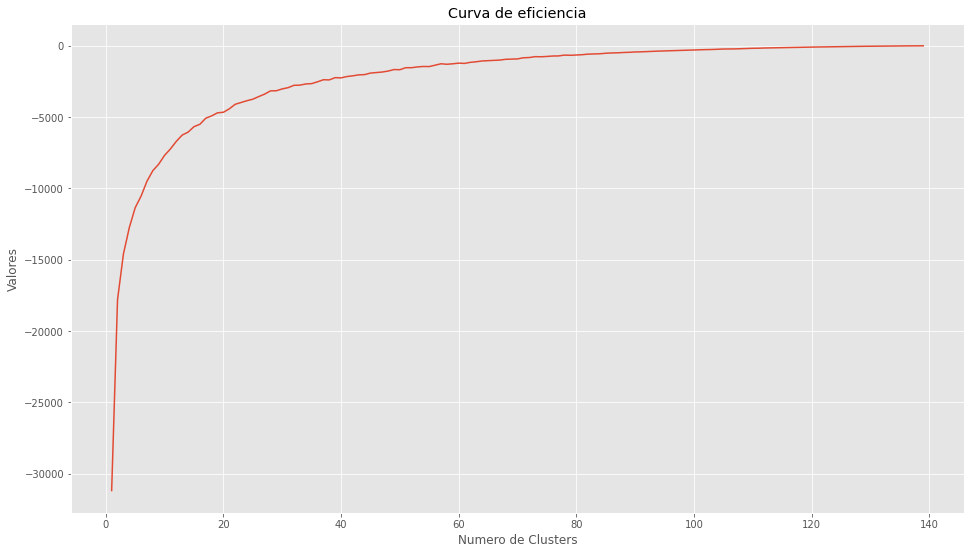

In [ ]:
Nc = range(1, 140)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

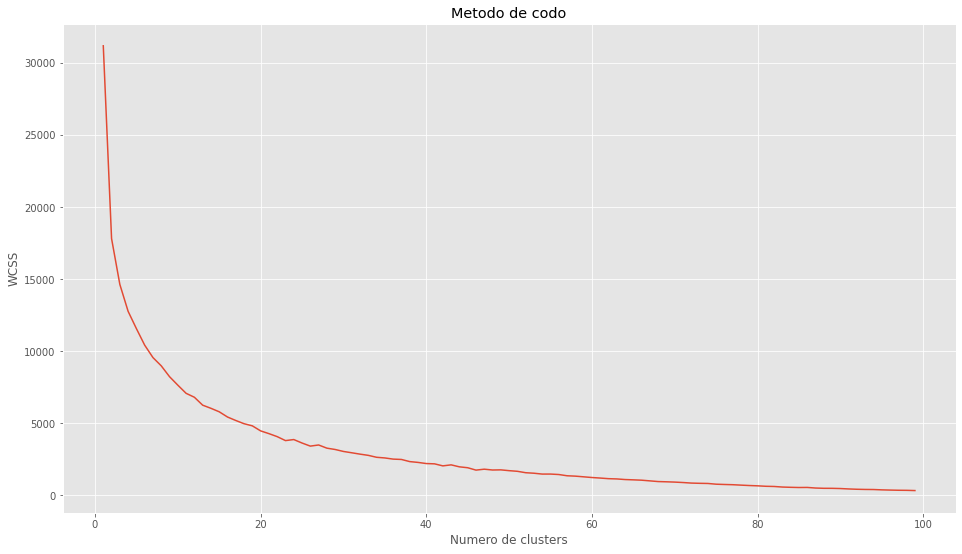

In [ ]:
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 100), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##Conocer los centroides

In [ ]:
kmeans = KMeans(n_clusters=20).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[41.2255372  29.2337206  35.6671642  19.5828026  10.1892144 ]
 [50.378105   19.15651367 43.47211133 15.77786667 15.48821   ]
 [36.64211845 22.35650209 46.51236845 31.28281536  8.19226855]
 [47.9898145  23.31135814 36.24045079 22.51611486  8.84884786]
 [42.81503362 16.7429275  49.18193375 29.82537     4.64779538]
 [52.09585092 20.827779   43.27481546 16.23490431  5.68020692]
 [55.49372536 24.30703609 35.09361018 17.23353482  6.91044755]
 [37.28619433 31.35778767 45.97186967 15.94645733  9.652164  ]
 [32.61728688 18.36209725 46.10696037 38.11487012  8.91079288]
 [46.6358026  26.4049866  40.7419058  17.155651    8.6428032 ]
 [40.979498   38.88333    32.042667   13.937303   12.8180975 ]
 [38.46713483 20.57746633 36.69644533 34.70281533  8.60563083]
 [41.17919425 23.644538   43.04987481 23.44831     8.97631406]
 [31.89659283 15.92909    55.9515465  31.92967183  5.00179033]
 [34.186667   14.967083   18.693542    9.682292    7.200208  ]
 [65.5299666  21.4103088  27.1434742  14.6252708   3.80

##visualizar grupos y centroides

In [ ]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan','orange','black','pink','brown','purple','silver','olive','fuchsia','chestnut','maroon','teal','turquoise','violet','scarlet','white']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
labels = kmeans.predict(X)
labels


array([ 2,  3, 11,  4,  2, 18, 18, 13,  9, 11,  5, 12,  6,  3, 12,  5,  2,
       12,  5,  8,  2,  1, 14,  8,  9,  3,  2, 18,  4,  3,  7,  5,  9,  6,
       13,  8,  4, 13,  4,  3, 12,  4, 12, 11, 16, 16,  1,  6,  8, 13,  5,
       12,  2, 15, 11,  6,  3,  9, 17,  6,  0,  0,  5,  6, 12, 12, 15, 19,
        6,  4, 12, 10,  9,  1, 12,  6, 18,  2, 13,  8,  8,  9,  6,  9,  3,
       12,  5, 12,  9,  9,  9,  0,  3,  9,  9, 12, 11,  5,  2,  9, 16,  3,
        3, 13, 15,  6, 18, 12, 12,  3,  9,  2,  2,  4,  7,  9, 10, 15,  4,
       12,  3,  2,  5,  0, 16, 17, 17,  5,  5,  3,  5,  5,  0,  7,  6, 11,
        8, 15,  3,  8], dtype=int32)

##visualización en 2D

In [ ]:
# mostramos grupos según Openess y Extraversion 
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
 
plt.scatter(f1, f2, c=ramdon(20), s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

NameError: ignored

In [ ]:
f1 = df_psico['op'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

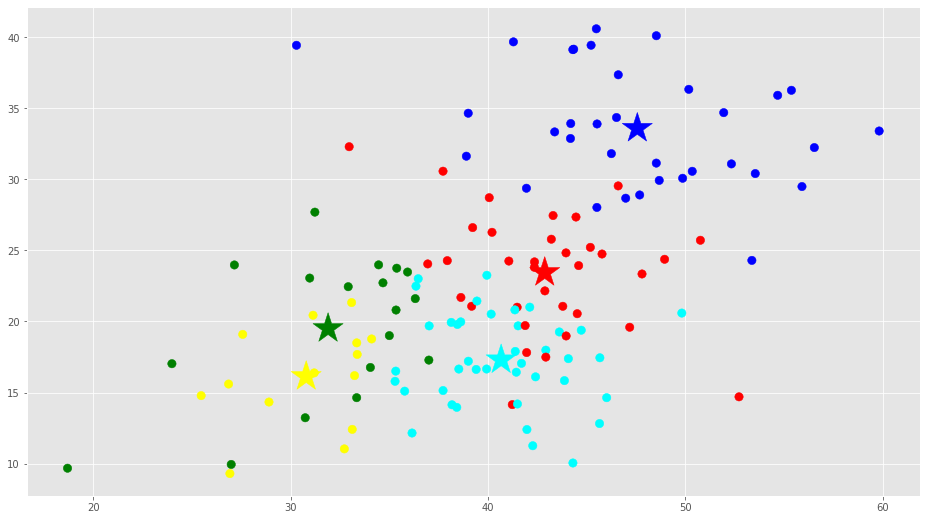

In [ ]:
f1 = df_psico['ex'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

##Ver resultados en tablas

In [ ]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,22
1,red,29
2,green,42
3,yellow,32
4,cyan,15


###diversidad por categorias laborales

In [ ]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,NaN
4,4,12.0
5,5,3.0
6,6,1.0
7,7,5.0
8,8,3.0
9,9,3.0


##usuarios con rasgos de personalidad más similares

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,3gerardpique,1
1,aguerosergiokun,0
2,albertochicote,1
3,AlejandroSanz,1
4,alfredocasero1,1


In [ ]:
df_cluster[df_cluster.cluster == 3]

,data_index,cluster
5,alo_oficial,3
6,andresiniesta8,3
14,BarackObama,3
17,BillGates,3
26,CFKArgentina,3
27,charliesheen,3
28,ChristianG_7,3
30,Clyburn,3
36,DANIROVIRA,3
38,David_Busta,3


###usuarios más relevantes en cada clouster

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

kobebryant
SerranoIsmael
carmenelectra
Pablo_Iglesias_
JudgeJudy


##clasificando nuevos datos

In [ ]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

# DATOS DE MERCADO DE VALORES (índice S&P 500)

---


*   El índice Standard & Poor's 500, también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado (https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
*   Lista de empresas que forman parte del índice Dow Jones Industrial Average de https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average



---
Tomaremos los datos publicados en https://www.kaggle.com/camnugent/sandp500

La data (CSV) tiene las siguientes columnas: Fecha - en formato: yy-mm-dd



*   OPEN-Abierto - precio de la acción en el mercado abierto (estos son datos de NYSE, así que todo en USD)
*   HIGH - Alto - Precio más alto alcanzado en el día
*   Low Close - Precio más bajo alcanzado en el día
*   Volumen - Número de acciones negociadas   
*   nombre: el nombre del ticker de la acción

##instalando librerias

In [3]:
# necesitamos la libreria WIKITABLES para descargar tablas de Wikipedia (y mantener actualizada la data)
# Necesitamos la libreria FSSPEC (Interfaces de sistema de archivos para Python)
# Necesitamos la libreria  beautifulsoup4 : para raspado web altamente evolucionadas
!pip install wikitables
!pip install fsspec
!pip install beautifulsoup4 

     |████████████████████████████████| 10.1 MB 3.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 176 kB 48.9 MB/s 
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=af2d573c0e4e010dacd483dea92ffe58cea480cf74b3e50ea9e9d00774985052
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry
     |████████████████████████████████| 134 kB 5.9 MB/s 


##Importando librerías

In [31]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D

import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [32]:
df_acciones = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/K_means_indice_S%26P_500.csv")
df_acciones.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


## conociendo y Preprocesando los datos



Vamos a usar datos semanales desde 2013 a 2018, donde cada acción tiene su propio rango de valores. Por ejemplo:
 

*   Apple (APPL) empieza en $67.85

*   Adobe (ADBE) en $39.12.

---

La intención de este ejercicio es agrupar las acciones por el comportamiento de sus ganancias, en vez de por su precio de mercado. De esta forma el rendimiento de cada acción es comparable con los demás.


In [33]:
#df_acciones.shape
#df_acciones.info()
#df_acciones.describe()
df_acciones.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

###Eliminando filas vacias
---

eliminamos los datos vacíos (NA) y resetamos el índice

In [34]:
df_acciones = df_acciones.dropna()   # Se eliminan filas que tengan valor NaN.
df_acciones = df_acciones.reset_index(drop=True)

###cambiando el tipo de dato en columnas

In [35]:
df_acciones['date']=pd.to_datetime(df_acciones['date'])       # Convertimos el campo DATE en tipo fecha
df_acciones = df_acciones.rename(columns={'Name':'symbol'})   #cambiamos el nombre la col de NAME a  SYMBOL
df_acciones.head()

,date,open,high,low,close,volume,symbol
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


###Descargamos la lista de las 500 compañias S&P 

---

Descargamos la tabla de wikipedia [ https://en.wikipedia.org/wiki/List_of_S%26P_500_companies ] y la guárdamos para su uso posterior

In [36]:
wikiurl="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"   # pagina de wikipedia donde esta la tabla
table_class="wikitable sortable jquery-tablesorter"                   # clase de la tabla
response=requests.get(wikiurl)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
indiatable=soup.find('table',{'id':"constituents"})                   # buscamos el objecto puede ser por la clase o por el ID
df_list_table=pd.read_html(str(indiatable))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df_companies=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe
df_companies.to_csv('companies.csv', index_label='row')
df_companies.head()


200


,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


###Descargamos la lista de las empresas que cotizan con el índice bursáil DOW JONES DJIA 

---

Descargamos la tabla de wikipedia [https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average] y la guárdamos para su uso posterior

In [37]:
wikiurl="https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"   # pagina de wikipedia donde esta la tabla
table_class="wikitable sortable jquery-tablesorter"                   # clase de la tabla
response=requests.get(wikiurl)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
indiatable=soup.find('table',{'id':"constituents"})                   # buscamos el objecto puede ser por la clase o por el ID
df_list_table=pd.read_html(str(indiatable))                           # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df_DowJones=pd.DataFrame(df_list_table[0])                            # convertimos la lista en un dataframe
df_DowJones.to_csv('DowJones.csv', index_label='row')
df_DowJones.head()

200


,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,3.02%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.60%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.25%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.96%


In [38]:
df_DowJones.info()
df_DowJones.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          30 non-null     object
 1   Exchange         30 non-null     object
 2   Symbol           30 non-null     object
 3   Industry         30 non-null     object
 4   Date added       30 non-null     object
 5   Notes            5 non-null      object
 6   Index weighting  30 non-null     object
dtypes: object(7)
memory usage: 1.8+ KB


,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
count,30,30,30,30,30,5,30
unique,30,2,30,20,18,5,30
top,3M,NYSE,MMM,Information technology,2013-09-20,As Minnesota Mining and Manufacturing,3.02%
freq,1,23,1,5,3,1,1


###definidiendo que columnas usaremos para el ejercicio

---
Para este análisis, no solo consideremos la fecha, el precio al cierre y el símbolo.


In [39]:
df_acciones = df_acciones[['date', 'close', 'symbol']]
df_acciones.head()

,date,close,symbol
0,2013-02-08,14.75,AAL
1,2013-02-11,14.46,AAL
2,2013-02-12,14.27,AAL
3,2013-02-13,14.66,AAL
4,2013-02-14,13.99,AAL


In [40]:
df_acciones.shape

(619029, 3)

###invertir el dataframe para tener las acciones por fecha y por empresa

colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda

In [41]:
#colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda
df_acciones = df_acciones.pivot(index='date', columns='symbol', values='close')
df_acciones = df_acciones.dropna(axis=1)    #borramos filas vacias
df_acciones.head(5)

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.12,45.70,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,44.60,14.46,78.39,68.5614,35.85,46.76,34.26,73.07,38.64,46.08,...,28.31,37.46,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,44.62,14.27,78.60,66.8428,35.42,46.96,34.30,73.37,38.89,46.27,...,28.41,37.58,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,44.75,14.66,78.97,66.7156,35.27,46.64,34.46,73.56,38.81,46.26,...,28.42,37.80,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,44.58,13.99,78.84,66.6556,36.57,46.77,34.70,73.13,38.61,46.54,...,28.22,38.44,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


###Normalización de los datos usando como base la fecha

---
Puede decidir volver a muestrear los datos:

*  W - para datos semanales
*  M - para datos mensuales
*  Q - para el trimestre
*  A - por año

In [42]:
df_acciones = df_acciones.resample('W').last()
df_acciones.head()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-10,45.08,14.75,78.90,67.8542,36.25,46.89,34.41,73.31,39.120,45.700,...,28.24,37.51,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-17,42.25,14.50,79.00,65.7371,37.58,46.60,35.08,74.16,38.635,46.175,...,28.67,38.12,88.36,42.80,31.88,28.28,63.99,75.90,24.34,33.98
2013-02-24,41.80,13.57,79.21,64.4014,38.46,46.95,34.55,74.80,38.550,45.520,...,28.99,37.96,89.20,41.78,32.48,27.79,65.45,74.14,24.04,32.59
2013-03-03,41.93,13.61,76.37,61.4957,37.81,47.98,33.60,74.82,39.830,45.230,...,28.82,36.65,89.43,41.16,32.60,27.49,65.21,74.99,24.04,34.60
2013-03-10,43.03,14.92,76.84,61.6742,37.34,48.48,34.68,78.35,41.500,46.050,...,29.66,38.37,88.97,42.74,34.84,28.43,67.72,75.40,25.30,34.09


##Graficando datos

---



1.   crear funcion para traer los nombres de la empresa 




In [43]:
#funcion para sacar el  nombre de las empresas segun  su sigla
def get_name(symbol):
    name = symbol
    try:
        name= df_companies.loc[df_companies['Symbol'] == symbol]['Security'].values[0]
    except:
        name='No tiene nombre el simbolo'
    return name

def plot_stock(symbol, df_acciones=df_acciones):
    name = str(get_name(symbol))
    df_acciones[symbol].plot(title=name, label=name, alpha=0.9);

In [45]:
get_name('AMZN')

'Amazon'

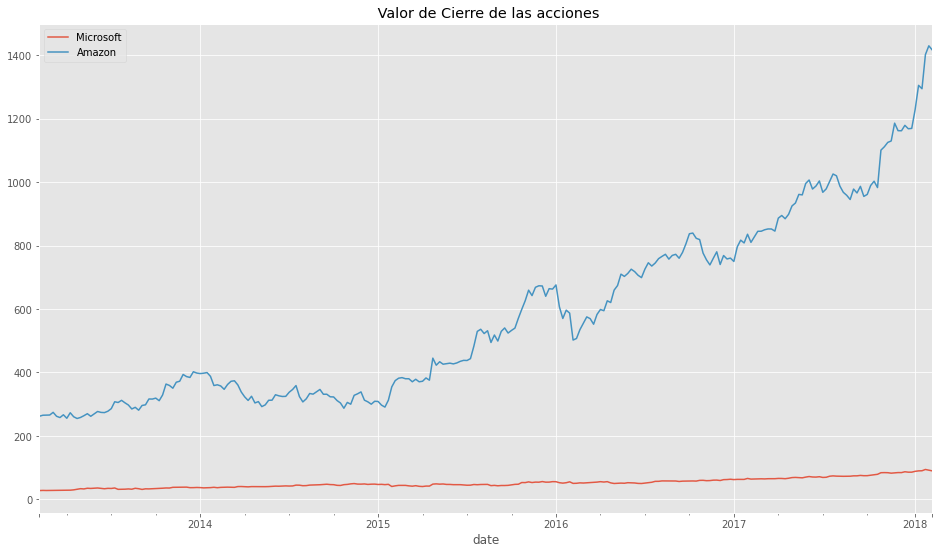

In [47]:
plot_stock('MSFT')
plot_stock('AMZN')
plt.title(' Valor de Cierre de las acciones')
plt.legend();

###Calcular los rendimientos para que podamos comparar las acciones

---
Calcularemos la devolución desde el primer día de la compra. Por lo tanto, el rendimiento de un día determinado es cuánto se ganaría (o perdería), en porcentaje, si las acciones se vendieran en este día (los costos de transacción no se consideran)


In [48]:
#df_acciones.head()
start = df_acciones.iloc[0]  #traemos la primera fila y la volvemos un vector
#calculamos el valor del retorno de la acción
returns = (df_acciones - start) / start
returns

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-02-17,-0.062777,-0.016949,0.001267,-0.031201,0.036690,-0.006185,0.019471,0.011595,-0.012398,0.010394,...,0.015227,0.016262,-0.002821,-0.001633,0.001256,0.043928,-0.020061,0.000659,0.008285,0.028139
2013-02-24,-0.072760,-0.080000,0.003929,-0.050886,0.060966,0.001280,0.004069,0.020325,-0.014571,-0.003939,...,0.026558,0.011997,0.006658,-0.025426,0.020101,0.025840,0.002297,-0.022544,-0.004143,-0.013918
2013-03-03,-0.069876,-0.077288,-0.032066,-0.093708,0.043034,0.023246,-0.023540,0.020597,0.018149,-0.010284,...,0.020538,-0.022927,0.009254,-0.039888,0.023869,0.014766,-0.001378,-0.011338,-0.004143,0.046899
2013-03-10,-0.045475,0.011525,-0.026109,-0.091078,0.030069,0.033909,0.007847,0.068749,0.060838,0.007659,...,0.050283,0.022927,0.004063,-0.003032,0.094221,0.049465,0.037060,-0.005933,0.048053,0.031467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-14,0.591171,2.964068,0.469455,1.609861,1.768000,1.111324,0.709968,1.184013,3.985941,1.013567,...,0.256728,0.990403,-0.012301,0.534640,0.029209,1.600960,0.280551,0.609756,1.207125,1.281089
2018-01-21,0.620896,2.936271,0.483143,1.630051,1.886621,1.133930,0.723627,1.206384,4.003323,1.103720,...,0.255312,1.018395,-0.016477,0.445066,-0.001256,1.654485,0.283461,0.627950,1.225766,1.318306
2018-01-28,0.659716,2.597966,0.567047,1.527625,2.398897,1.249520,0.843069,1.217296,4.145706,1.053392,...,0.298513,0.917889,0.004401,0.465827,0.031093,1.746770,0.320061,0.664206,1.237780,1.423298


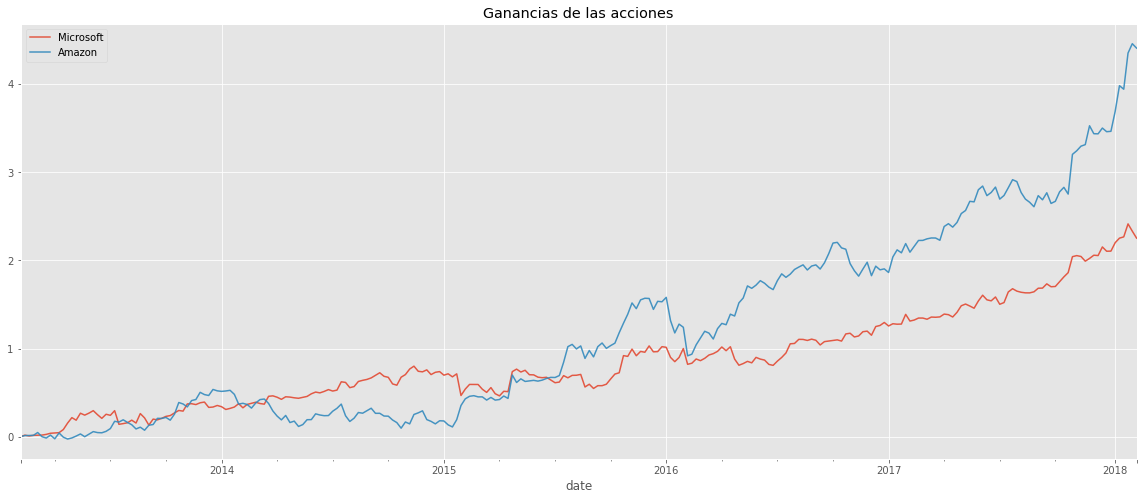

In [49]:
plt.figure(figsize = (20,8))
plot_stock('MSFT', df_acciones=returns)
plot_stock('AMZN', df_acciones=returns)
plt.title('Ganancias de las acciones')
plt.legend();

###¿Cuáles fueron las acciones de mejor y peor desempeño?

### las mejores y las peores 5 empresas con retorno

In [50]:
best = returns.iloc[-1].sort_values(ascending=False).head() # traemos las acciones mejor ordenadas
worst = returns.iloc[-1].sort_values().head()   #traemos las acciones con el orden inverso (las peores)
print ('--------peores--> ', worst.shape)
print(worst)
print ('--------mejores--> ',best.shape)
print(best)

--------peores-->  (5,)
symbol
CHK     -0.857143
RRC     -0.818157
DISCA   -0.676508
DISCK   -0.660217
MOS     -0.588762
Name: 2018-02-11 00:00:00, dtype: float64
--------mejores-->  (5,)
symbol
NVDA    17.496362
NFLX     9.233321
ALGN     6.159487
EA       6.084053
STZ      5.723705
Name: 2018-02-11 00:00:00, dtype: float64


####Las mejores

In [51]:
print('____mejor rendimiento de las acciones_____')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in best.index.tolist()]}, index = best.index)
best = pd.concat((best, names), axis=1)
best.head()

____mejor rendimiento de las acciones_____


,2018-02-11 00:00:00,name
symbol,,
NVDA,17.496362,Nvidia
NFLX,9.233321,Netflix
ALGN,6.159487,Align
EA,6.084053,Electronic Arts
STZ,5.723705,Constellation Brands


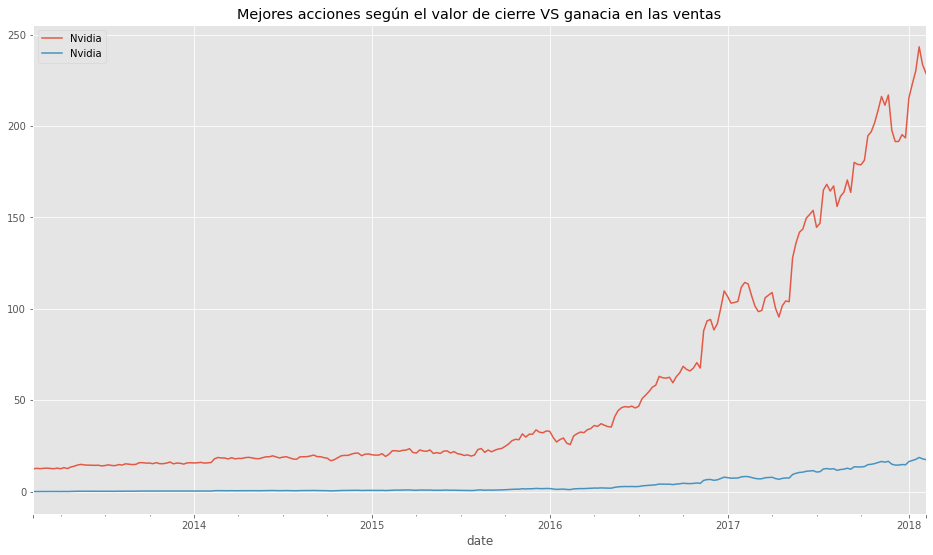

In [52]:
plot_stock('NVDA')
plot_stock('NVDA', df_acciones=returns)
plt.title('Mejores acciones según el valor de cierre VS ganacia en las ventas')
plt.legend();

####las peores

In [53]:
print('Peores perdidas de acciones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in worst.index.tolist()]}, index = worst.index)
worst = pd.concat((worst, names), axis=1)
worst

Peores perdidas de acciones


,2018-02-11 00:00:00,name
symbol,,
CHK,-0.857143,No tiene nombre el simbolo
RRC,-0.818157,No tiene nombre el simbolo
DISCA,-0.676508,Discovery (Series A)
DISCK,-0.660217,Discovery (Series C)
MOS,-0.588762,Mosaic


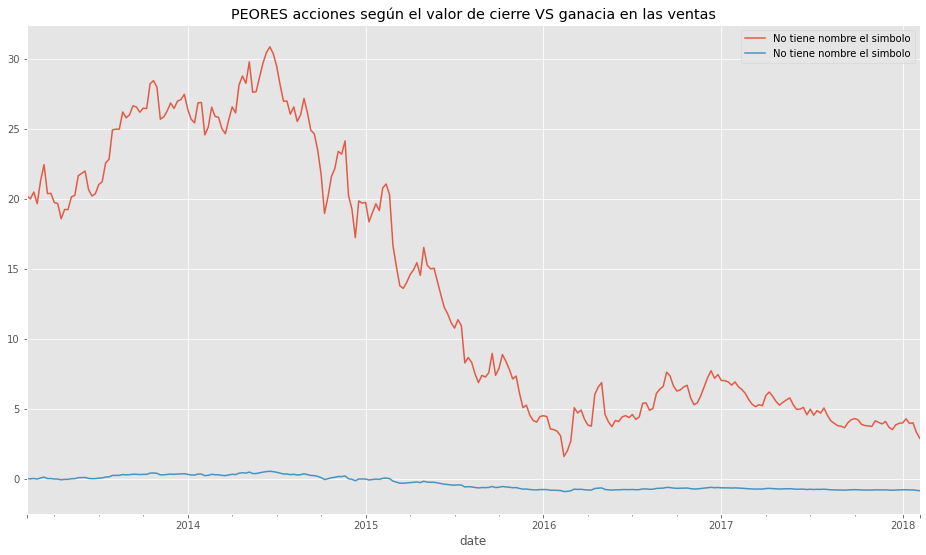

In [54]:
plot_stock('CHK')
plot_stock('CHK', df_acciones=returns)
plt.title('PEORES acciones según el valor de cierre VS ganacia en las ventas')
plt.legend();

##Conociendo el indice de acciones del DOWN JONES

In [55]:
#cargamos en una lista las acciones de las empresas que se riguen por el indice del DOWN JONES
down_acciones = [s for s in df_DowJones['Symbol'] if s in df_acciones.columns]  
dow_returns = returns[df_DowJones]   #calculamos las ganancias 
dow_returns.head(30)

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
print(down_acciones)

['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT']


### calculamos los mejores y los peores del DOWN JONES

In [57]:
best_dow = dow_returns.iloc[-1].sort_values(ascending=False).head()
worst_dow = dow_returns.iloc[-1].sort_values().head()
print('mejores...', best_dow)
print('peores...', worst_dow)
#-----------------------
print('Las cinco mejores rendimientos de las acciones Dow Jones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in best_dow.index.tolist()]}, index = best_dow.index)
best_dow = pd.concat((best_dow, names), axis=1)
#best_dow

mejores... symbol
A      NaN
AAL    NaN
AAP    NaN
AAPL   NaN
ABBV   NaN
Name: 2018-02-11 00:00:00, dtype: float64
peores... symbol
A      NaN
AAL    NaN
AAP    NaN
AAPL   NaN
ABBV   NaN
Name: 2018-02-11 00:00:00, dtype: float64
Las cinco mejores rendimientos de las acciones Dow Jones


####Las mejores

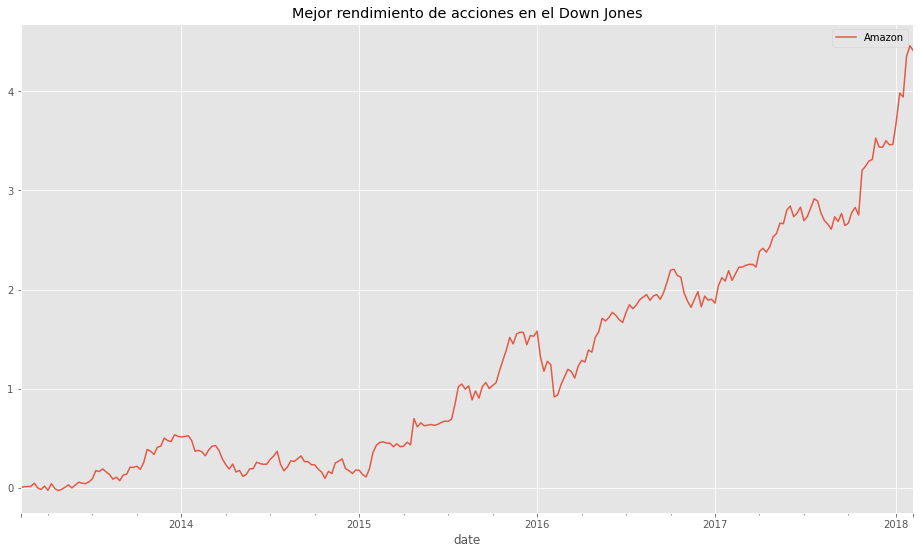

In [58]:
plot_stock('AMZN', df_acciones=returns)
plt.title('Mejor rendimiento de acciones en el Down Jones')
plt.legend();

####Las peores

In [30]:
print('Las cinco peores rendimientos de las acciones Dow Jones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in worst_dow.index.tolist()]}, index = worst_dow.index)
worst_dow = pd.concat((worst_dow, names), axis=1)
worst_dow

Las cinco peores rendimientos de las acciones Dow Jones


,2018-02-11 00:00:00,name
symbol,,
A,NaN,Agilent Technologies
AAL,NaN,American Airlines Group
AAP,NaN,Advance Auto Parts
AAPL,NaN,Apple
ABBV,NaN,AbbVie


#DATOS DE MERCADEO DE VALORES (Acciones de Amazon)

---
Vamos a aplicar el algoritmo sobre un conjunto de datos de las acciones de Amazon en bolsa de Estados unidos, donde bucaremos :


*   la señal CLOSE (precio de cierre diario) 
*   la señal VOLUME (número de acciones que han cambiado de manos a lo largo de dicho período de tiempo).


https://es-us.finanzas.yahoo.com/


##Importando librerías generales

In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Descargando data usando Web-scrawping

###Consumiendo data (web scraping) 

In [60]:
#UrlWeb="https://es.wikipedia.org/wiki/Departamentos_de_Colombia"
#ClassName="wikitable sortable jquery-tablesorter"
UrlWeb= "https://es-us.finanzas.yahoo.com/quote/AMZN/history?period1=1578009600&period2=1648080000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
ClassName="W(100%) M(0)"                                                               #clase de la tabla 

####Op1-con BeautifulSoup

In [61]:
import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

In [ ]:
response=requests.get(UrlWeb)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
tabla= soup.find_all(class_=ClassName)
df_list_table=pd.read_html(str(tabla))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
dfs=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe
#df.to_csv('dataAcciones.csv', index_label='row')
df.head()

####Opt2-con Selenium (cuando bloquean las páginas para robots)

---
A diferencia de Scrapy y de BeautifulSoup, Selenium no trabaja con el texto fuente en HTML de la web en cuestión, sino que carga la página en un navegador sin interfaz de usuario que crea un DOM ( Document Object Model-modelo de objetos de documento). En este navegador se puede simular clic's 
*   URL → Solicitud HTTP → HTML → Selenium → DOM


In [62]:
!pip install kora -q
!apt install chromium-chromedriver
!pip install selenium

     |████████████████████████████████| 57 kB 2.6 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 88.3 MB of archives.
After this operation, 294 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 99.0.4844.51-0ubuntu0.18.04.1 [1,143 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 99.0.4844.51-0ubuntu0.18.04.1 [77.6 MB]
Get:3 htt

In [63]:
from kora.selenium import wd
wd.get(UrlWeb)
soup = BeautifulSoup(wd.page_source, 'html.parser') 

In [64]:
tabla= soup.find_all(class_=ClassName)
df_list_table=pd.read_html(str(tabla))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe

In [71]:
#df.head(10)                                                       #LAS PRIMERAS FILAS
df.tail(10)                                                         #Las ultimas filas

,Fecha,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
90,2021-11-11,3513.00,3543.24,3467.47,3472.50,3472.50,2264400
91,2021-11-10,3563.87,3605.45,3463.09,3482.05,3482.05,4027400
92,2021-11-09,3515.25,3593.77,3501.43,3576.23,3576.23,4294900
93,2021-11-08,3523.24,3579.00,3487.86,3488.98,3488.98,3074000
94,2021-11-05,3477.00,3566.25,3476.98,3518.99,3518.99,4997000
95,2021-11-04,3370.00,3498.63,3365.00,3477.00,3477.00,5353000
96,2021-11-03,3309.00,3394.92,3297.52,3384.00,3384.00,3397200
97,2021-11-02,3315.01,3331.12,3283.55,3312.75,3312.75,2627600
98,2021-11-01,3361.80,3375.86,3292.02,3318.11,3318.11,3608900
99,2021-10-29,3300.02,3374.82,3273.32,3372.43,3372.43,6486100


In [66]:
#tenemosque borrar la ultima fila
df = df[:-1]


##Conociendo los datos descargados

In [68]:
print(df.info())
print("____________describe____________\n",df.describe())
print("____________nulos?____________\n",df.isnull().sum())
#print("Rows, Cols->",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Fecha              100 non-null    object
 1   Abrir              100 non-null    object
 2   Alto               100 non-null    object
 3   Bajo               100 non-null    object
 4   Cierre*            100 non-null    object
 5   Cierre ajustado**  100 non-null    object
 6   Volumen            100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB
None
____________describe____________
               Fecha    Abrir     Alto     Bajo  Cierre* Cierre ajustado**  \
count           100      100      100      100      100               100   
unique          100       98      100      100      100               100   
top     23 mar 2022  2895.00  3327.40  3253.74  3268.16           3268.16   
freq              1        2        1        1        1                 1   

        V

###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo:
*   conversión de datos de object a int/float o dateime
*   eliminar campos que no usaremos
*   En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


####Convertimos los campos object a datetime o numeric (int/float)

In [69]:
df['Fecha']= df['Fecha'].str.replace(' ene ','/01/')
df['Fecha']= df['Fecha'].str.replace(' feb ','/02/')
df['Fecha']= df['Fecha'].str.replace(' mar ','/03/')
df['Fecha']= df['Fecha'].str.replace(' abr ','/04/')
df['Fecha']= df['Fecha'].str.replace(' may ','/05/')
df['Fecha']= df['Fecha'].str.replace(' jun ','/06/')
df['Fecha']= df['Fecha'].str.replace(' jul ','/07/')
df['Fecha']= df['Fecha'].str.replace(' ago ','/08/')
df['Fecha']= df['Fecha'].str.replace(' sep ','/09/')
df['Fecha']= df['Fecha'].str.replace(' oct ','/10/')
df['Fecha']= df['Fecha'].str.replace(' nov ','/11/')
df['Fecha']= df['Fecha'].str.replace(' dic ','/12/')

In [70]:
df['Fecha']=pd.to_datetime(df['Fecha'], dayfirst = True)        # Convertimos el campo FECHA en tipo DATETIME
df['Abrir'] = pd.to_numeric(df['Abrir'])                        #  convertimos el campo a numerico 
df['Alto'] = pd.to_numeric(df['Alto'])
df['Bajo'] = pd.to_numeric(df['Bajo'])
df['Cierre*'] = pd.to_numeric(df['Cierre*'])
df['Cierre ajustado**'] = pd.to_numeric(df['Cierre ajustado**'])
df['Volumen'] = pd.to_numeric(df['Volumen'])

In [72]:
#salvamos el dataFrame 
df.to_csv('Precio_amazon_2020_2022.csv', index_label='row')

####Eliminando columnas que no necesitaremos (por ahora)

---
extraemos la columna DATE (fecha) que no usaremos en el algoritmo k-means. Antes de extraerla la guardaremos en la variable dates, ya que volveremos a insertarla en nuestro dataframe tras aplicar el algoritmo


In [73]:
#borrar nulos o no?
df = df.dropna()
df = df.reset_index(drop=True)

In [74]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Fecha'] # Guardamos la columna Date.
df = df.drop('Fecha', 1) # Borramos la columna del dataframe.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


####normaliza todos los datos entre [0, 1].

---
En este caso utilizaremos la función MinMaxScaler()


In [75]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0:'Abrir',1:'Alto',2:'Bajo',3:'Cierre*',4: 'Cierre ajustado**', 5: 'Volumen'})

In [76]:
df_escalado.head()
#df_escalado.isnull().sum()

,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen
0,0.552011,0.545787,0.579814,0.561475,0.561475,0.092135
1,0.513207,0.541545,0.560138,0.591830,0.591830,0.130141
2,0.499224,0.477125,0.517401,0.522193,0.522193,0.141404
3,0.411217,0.445991,0.446862,0.517253,0.517253,0.308091
4,0.325979,0.360414,0.369771,0.435031,0.435031,0.170784


###Representación gráfica de los datos.

---


*   Ahora podemos echar un vistazo a la representación gráfica de nuestros datos. En el eje x representaremos el precio de cierre (CLOSE) y en el eje y el volumen (VOLUMEN)
*   VAMOS A representar gráficamente los datos normalizados, pero que, si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual, con la única diferencia que la escala de los ejes sería diferente.





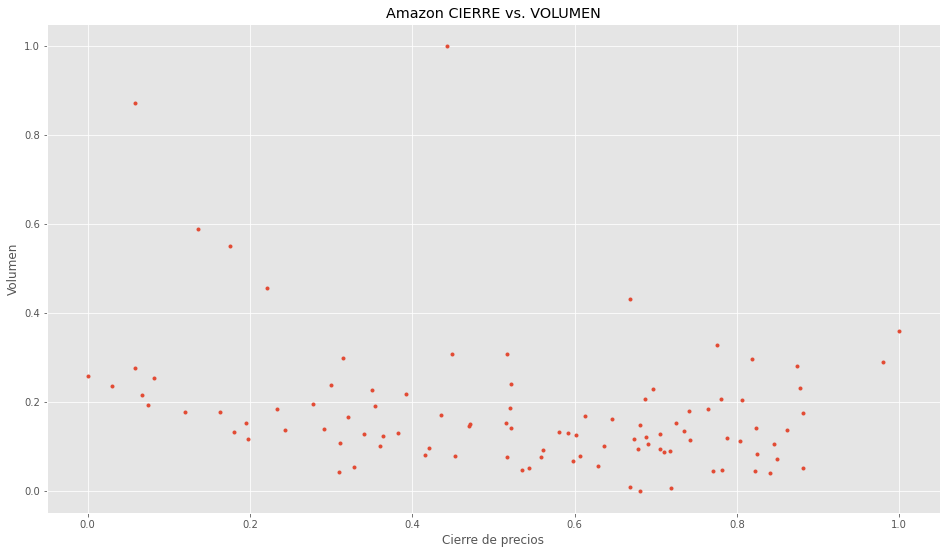

In [78]:
#%% Representación gráfica de los datos.
x = df_escalado['Cierre*'].values
y = df_escalado['Volumen'].values
plt.xlabel('Cierre de precios')
plt.ylabel('Volumen')
plt.title('Amazon CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=3)

##Aplicación de k-means.

---
El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar:


1.    Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos
2.    realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo”   (**----ESTA ME GUSTA MÁS---**)




###Realizar una gráfica elbow o de codo

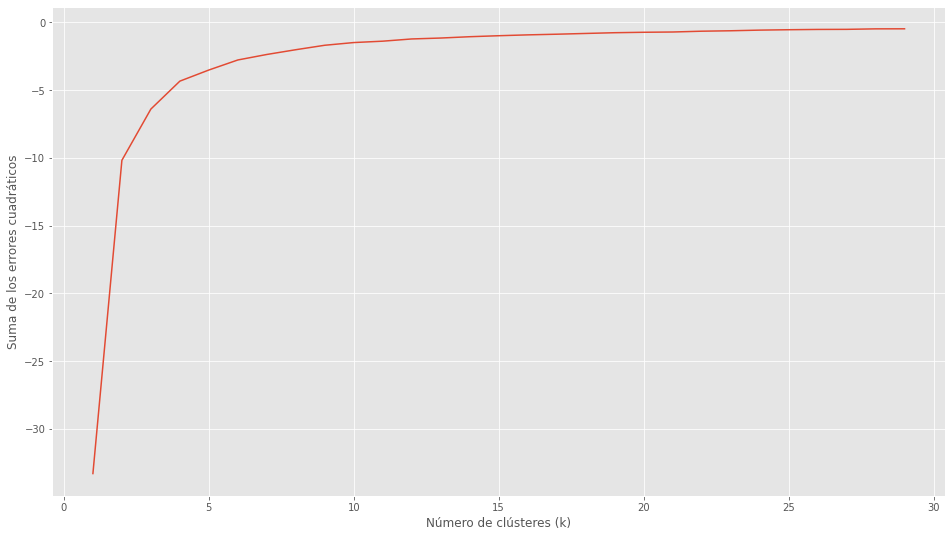

In [79]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

####NOTA: 

---


**No hay una solución, un valor de k, más correcto que otro**, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que **nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución** escogida

###Aplicar el algoritmo de k-mean

In [80]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

[[0.8230901  0.8183396  0.82176896 0.8294031  0.8294031  0.15756975]
 [0.37361554 0.35649193 0.37478052 0.38836124 0.38836124 0.15637201]
 [0.14374943 0.13045127 0.12952763 0.1422481  0.1422481  0.20400823]
 [0.62252605 0.6032125  0.62810436 0.63980024 0.63980024 0.11628657]
 [0.19840861 0.20359191 0.16919354 0.20667575 0.20667575 0.69349478]]


###Etiquetado de datos.

---
asignamos cada registro de nuestro dataset a uno de los clústers


In [81]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

In [82]:
df.head(10)

,Date,Abrir,Alto,Bajo,Cierre*,Cierre ajustado**,Volumen,label
0,2022-03-23,3274.10,3327.40,3253.74,3268.16,3268.16,2790600,3
1,2022-03-22,3236.11,3323.34,3233.98,3297.78,3297.78,3204300,3
2,2022-03-21,3222.42,3261.68,3191.06,3229.83,3229.83,3326900,3
3,2022-03-18,3136.26,3231.88,3120.22,3225.01,3225.01,5141300,1
4,2022-03-17,3052.81,3149.97,3042.80,3144.78,3144.78,3646700,1
5,2022-03-16,2970.00,3063.00,2947.07,3062.08,3062.08,4247900,1
6,2022-03-15,2857.00,2959.70,2840.00,2947.33,2947.33,3779200,2
7,2022-03-14,2919.62,2949.00,2817.68,2837.06,2837.06,3704300,2
8,2022-03-11,2991.49,2993.50,2907.38,2910.49,2910.49,3440500,2
9,2022-03-10,2913.70,2973.49,2879.56,2936.35,2936.35,6753100,4


##Representación gráfica de los clústeres k-means.

---
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variable


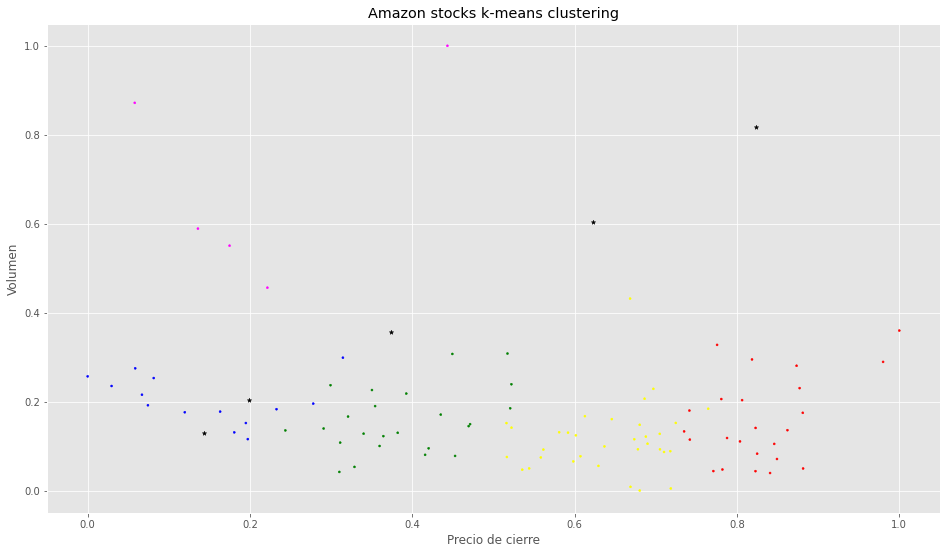

In [83]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=4)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('Amazon stocks k-means clustering')
plt.show()

**Que podemos inferir???**